# COGS 118A- Project Checkpoint

# Names

- Adi Krishnamoorthy
- Akshat Mittal
- Anthony Truong
- Brandon Kao

# Abstract 
The goal of this project is to develop and algorithm that can determine the fair market value of used cars based on a variety of factors. The dataset we intend on using contains multiple specifications of a car being sold such as the bed height, the city the car is being sold in etc. We will be creating a regression model and running it on the training data set and later use a test set. Success will be measured by minimizing the evaluation metrics of mean squared error and mean absolute error. 


# Background

According to Mordor Intelligence, the US used cars market was evaluated at USD 195.84 billion in 2021 and is expected to balloon to USD 302.47 billion by 2027 (MordorIntelligence). In comparison, the used apparel market in the US is expected to grow to USD 82 billion by 2026 (Clark). A market this big begs to be studied and an algorithm that can provide customers with an estimate of the value of the car they are looking to buy or sell will help them make the right financial decisions. Prior research in this field has analyzed the used car markets in various foreign countries such as the UAE (AlShared) and Turkey (Bilen). Work done by Bilen on the Turkey market was able to achieve the lowest estimation error of MAE 0.01050 and MSE 0.000281 using the Fisher+ANN model. However, the only variables they looked into were horsepower, engine, brand, gear, and the model year. In contrast, the UAE study deals with less technical and more superficial factors such as the mileage and the color of the vehicle. Using the PSO-GRA-BPNN model, the study was able to achieve an MAE of 0.475.

# Problem Statement

The problem that we are solving is the unknown and ambiguous pricing of used cars in the U.S for both buyers and sellers. The buyer does not want to pay more than what the car is worth, but can not limit their budget so much that they are unable to purchase an acceptable car at all. For the seller, they usually want to sell the car as soon as possible, but avoid decreasing the price to the point where they’re losing money. The ability to accurately predict used car prices has significant implications for both the automobile industry as well as for individual buyers and sellers. To quantify and measure the problem, we can look at the variance between cars with very similar features and how much their prices and how much time the car is listed to sell and if that is consistent with our prediction or potentially survey people if they are satisfied with the amount of money they paid/received for their car (iSeeCars). But ultimately, we want to accurately predict what a used car’s listing price will be given some features such as mileage or age. As the used car market does not seem to be slowing down anytime soon (ACV Auctions), the problem will be replicable.

# Data

We are using three different datasets found here:
  - Link: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset
  - Link: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
  - Link: https://www.kaggle.com/datasets/3ea0a6a45dbd4713a8759988845f1a58038036d84515ded58f65a2ff2bd32e00?select=us-dealers-used.csv (Only the US section since different countries have different markets, regulations, etc surrounding this industry)



- We have combined these datasets into 1 single huge dataset and cleaned it for our purposes
- The combined dataset has 10 variables since we can only use the variables common across all 3 datasets. This also helps us narrow down the number of variables we plan on using. Furthermore, the data set has about 10.5 million observations but there are also a lot of unusable ones because of null values. Observations with even a single null value for a variable is removed from the dataset.
- An observation has these values:
  - make
  - price
  - year 
  - state
  - fuel
  - miles traveled
  - model
  - vin (We can get a lot more data from a vin number as seen here: https://www.autocheck.com/vehiclehistory/vin-basics)
  - plant where the car was manufactured (from VIN number)
  - whether it was autorized by the manufacturer (from VIN number)
  - where the vehicle was built (from VIN number)

- Some critical values are the make, year, and the miles travled of the vehicle. We asssume that these are the most important factors in determining the listed price of the car. Since the make and year are categorical vehicles, we will be utilizing one hot encoding to use them
- Lastly, besides removing the null values, we need to create a VIN decoder algorithm to figure out the last 3 variables listed above. This should be fairly easy since we need to look at 3 different digits and figure out what values they represent.


# Proposed Solution

A possible solution to the problem of predicting the prices of used cars is to build a machine learning model with polynomial regression that can learn the relationship between the car features and its price from historical data. The goal of this solution is to create a model that can accurately predict the price of a used car based on its characteristics such as the make, model, year, mileage, condition, location, and other relevant features. To effectively model the intricate connections between each feature, a classification or regression tree(CART) can be used, although it runs the risk of overfitting and high variance. In order to optimize the quality of the model, we will conduct pre-processing on the data by eliminating less useful features and prune less useful branches. First, we need to prepare the data for the analysis by separating the features from the prediction variable, which is the price listed, and then dividing the data into training and testing sets using train_test_split. Next, we can clean the data by getting rid of features that won't be useful for the analysis and make sure the rest are comparable with one another. After that, we can use sklearn.tree’s DecisionTreeClassifier module to create and fit trees with different hyperparameters such as max_depth and use grid search to choose the best one. Finally, we can evaluate the model's accuracy using evaluation metrics such as mean squared error or mean absolute error. We can compare our model to pre-existing models that also predict prices of used cars but with different methods. Such as the SOTA series of AI Blue Book models created by Yang et al., which used 6 different models from ranging from CNN to HOG. 


# Evaluation Metrics

Mean Squared Error
Mean Absolute Error

As we will be predicting the price of car listings, we can measure the performance of our model by using both Mean Squared Error (MSE) and Mean Absolute Error (MAE). MSE is the mean of the squared error and can be expressed mathematically as 

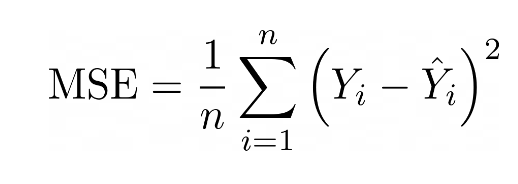

MAE is the mean of the absolute error and can be expressed mathematically as 




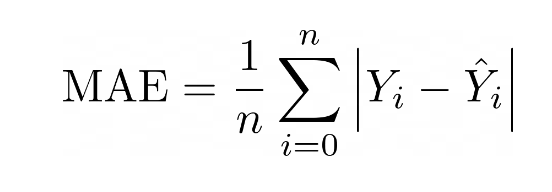
where Y_i are the observed prices and Y_i hat are the predicted prices. 

# Preliminary Results

We cleaned the data (via loops and dictionaries) and chose the features we were to examine. We then used the scikit-learn library's train-test split to divide our data into that used for training and testing.

We used a Pipeline in order to scale the data (StandardScaler) and apply logistic Regression on it. We then fit the training data to the pipeline and scored it on the test set, getting a score of 0.03125. After getting this score, we used the previously described metrics to measure the difference between the predicted values of y and the actual (test) values of y. The Mean-Squared Error (MSE) of the predicted and actual values was 1266158809.7396. The Mean Absolute Error (MAE) between the two was 17834.0104, and the R2 score was -1.5143.

After seeing our results for logistic regression, we decided to try out a more complex model, and used a Decision Tree Regressor. Using the same training data as we did when using Logistic Regression, we fit it to the Decision Tree Regressor and scored it. The score we got for this was 0.33127. We then applid the same metrics as previously mentioned, and got a MSE of 336759405.6398, a MAE of 14012.5374 and a R2 score of 0.33127.

With these results, we decided to investigate Decision Tree Regressors further. We applied One Hot Encoding using scikit-learn's OneHotEncoder to both the `fuel` and `make` features to make these features usable. We then made a Decision Tree Regressor model, with parameters `max_depth=20, min_samples_leaf=35`. This model achieved a 0.655 R-squared score on the test set. 

We also made learning curves to see how different models performed at at different training set sizes. 

Learning curve for `DecisionTreeRegressor()`:

![lc1](https://drive.google.com/uc?export=view&id=15eu2RQGsBPsJaGVsq2f1B33gbSzWbx3q)

Learning curve for `LinearSVR()`:

![lc2](https://drive.google.com/uc?export=view&id=1922Y1JAvs7ldw90h-ANe7iBOS9M4dbT3)


# Ethics & Privacy

One ethical concern is that of privacy. For example, if a car in the dataset has obvious collision or dent marks, then it could bring in a variable of the driving history of the seller, which could raise privacy concerns. Furthermore, the algorithm may also unintentionally raise or lower the prices of certain types of cars, which could have a slight effect on the vehicle industry economy overall. Lastly is the issue of transparency - if the audience of this algorithm does not fully understand how it works or arrives to a price, they may be inclined to not believe it and sell their car for whatever price they want to sell it for.

# Team Expectations 

- Interactions: Our primary method of communication will be via discord. We will chat and share our findings/results on it and conduct meetings either on discord itself or in-person.
- Conflict and Difficulty: If two of us disagree on a certain topic, they will relay it to the other two members and ask them to give their input. All four of us will then find a solution to the conflict we are having together and will make compromises for each other if necessary.
- Making Decisions: Since this is a team project, all important decisions that we need to make will be discussed with every team member to ensure that we are all up-to-date on them. We will make decisions together and ensure each of us has a fair say in them.
- How much work we expect from each other: We expect to work together on as much of the project as possible, and on the parts where we work individually, we would like to ensure that no group member has to work harder than the rest and no group member slacks off. To do this, we will divide up the individual work evenly.
- Deadlines: Ideally, we would like to finish a rough draft of each part we have to submit (the proposal, peer reviews, project checkpoint and final report) at least four days before they are due. This will allow us to discuss the rough draft with each other and get everyone’s input on how to improve all portions of the part we are to submit, and have ample time to implement those changes before we submit it.


# Project Timeline Proposal

While the timeline has gone to plan so far, a spanner was thrown in the works when we realized that logistic regression won't cut it for our project. Instead, we will be using CART which adds an extra meeting to our calendar.

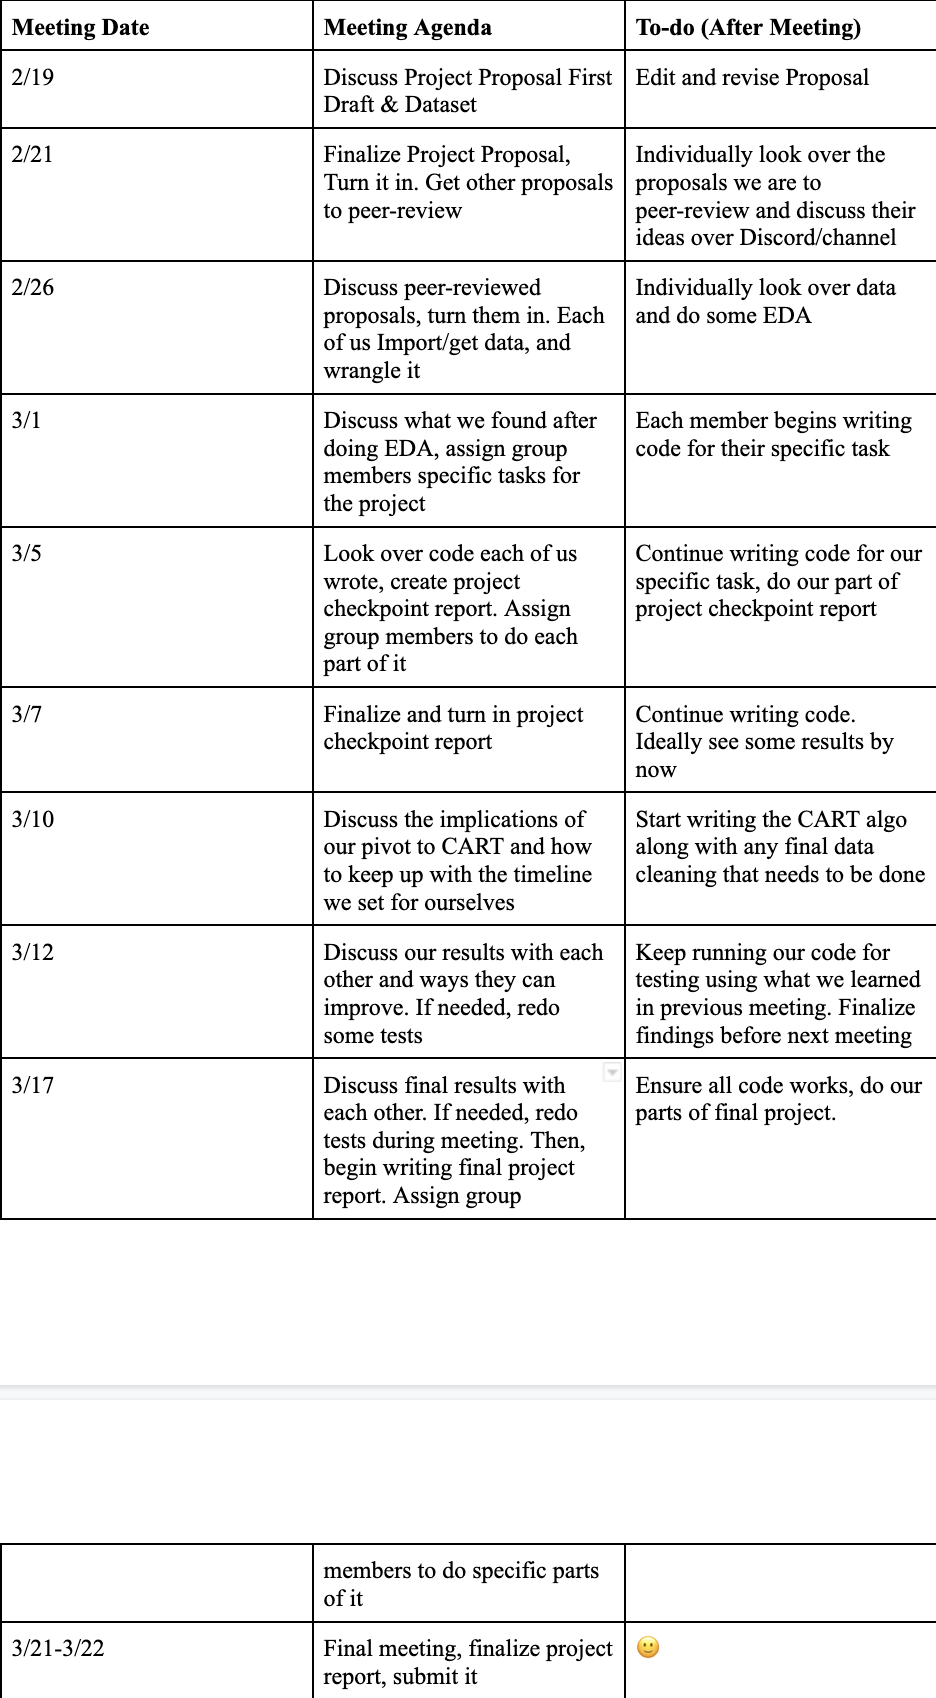

# Footnotes
- MordorIntelligence. “US Used Car Market Research - Share, Size & Trend Analysis - Industry Report.” Mordor Intelligence, https://www.mordorintelligence.com/industry-reports/united-states-used-car-market. Accessed 21 February 2023.
- Clark, Karen. “thredUP Releases 10th Annual Resale Report with Insights on a Decade of Resale — thredUP newsroom.” thredUP newsroom, 17 May 2022, https://newsroom.thredup.com/news/thredup-releases-10th-annual-resale-report-with-insights-on-a-decade-of-resale. Accessed 21 February 2023.
- AlShared, Abdulla. “Used Cars Price Prediction and Valuation using Data Mining Techniques.” RIT Scholar Works, 12 2021, https://scholarworks.rit.edu/cgi/viewcontent.cgi?article=12220&context=theses. Accessed 21 February 2023.
- Bilen, Mehmet. (2021). Predicting Used Car Prices with Heuristic Algorithms and Creating a New Dataset. 6. 29-43. 
- ACV Auctions. “Used Car Sales Data: Used Car Market Statistics: ACV Auctions.” ACV Auction, ACV Auctions, 24 June 2022, https://www.acvauctions.com/blog/used-car-sales-data.
- iSeeCars. “How Long Will It Take You to Sell Your Used Car?” CBS 42, CBS 42, 18 Sept. 2021, https://www.cbs42.com/news/business/how-long-will-it-take-you-to-sell-your-used-car/#:~:text=Analyzing%20over%20900%2C000%20new%20and,takes%2034.6%20days%20to%20sell. 
- Yang, Richard R, et al. “AI Blue Book: Vehicle Price Prediction Using Visual Features.” 29 Mar. 2018, https://arxiv.org/pdf/1803.11227v2.pdf. Accessed 8 Mar. 2023. 


